In [3]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt


In [4]:
Fs_solid, y_solid_temp = wavfile.read("Solid_IMG_4876.wav" )
Fs_hollow, y_hollow_temp = wavfile.read("hollow_IMG_4876.wav")

y_solid = y_solid_temp[:, 0]
y_hollow = y_hollow_temp[:, 0]

y_s0 = y_solid[10000:10000+ 16384].astype(np.float)
y_h0 = y_hollow[52000:52000+ 16384].astype(np.float)

y_s = y_s0 / ( max(y_s0)- min(y_s0) )
y_h = y_h0/( max(y_h0)- min(y_h0) )



/Users/ryanning/.virtualenvs/py37cv2/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.
/Users/ryanning/.virtualenvs/py37cv2/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/Users/ryanning/.virtualenvs/py37cv2/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/Users/ryanning/.virtualenvs/py37cv2/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`

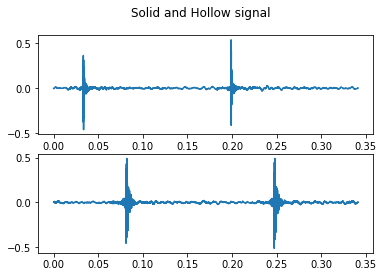

In [5]:
length = len(y_s) / Fs_solid
time = np.linspace(0., length, num = len(y_s))
fig, axs = plt.subplots(2)
fig.suptitle('Solid and Hollow signal')
axs[0].plot(time, y_s)
axs[1].plot(time, y_h)

In [6]:
Fs = Fs_hollow
T = 1/Fs
L = len(y_s)
w_k =  np.kaiser(L, 20)

Y_H = fft(y_s * w_k ) 
Y_S = fft(y_h * w_k )


In [7]:
P2H = abs(Y_H/L)
P1H = P2H[1:int(L/2+1)]
P1H[2:-1] = 2*P1H[2:-1]

P2S = abs(Y_S/L)
P1S = P2S[1:int(L/2+1)]
P1S[2:-1] = 2*P1S[2:-1]

f = Fs * np.arange(0,L/2,1) / L



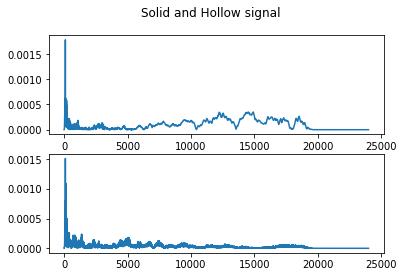

In [81]:

fig, axs = plt.subplots(2)
fig.suptitle('Solid and Hollow signal')
axs[0].plot(f, P1H)
axs[1].plot(f, P1S)

In [82]:
print(np.sum(P1H[2000:-1]*P1H[2000:-1])*10000)
print(np.sum(P1S[2000:-1]*P1S[2000:-1])*10000)

1.3936721142288409
0.060085100952008155
